<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/applepomm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [22]:
path = Path("/content/sample_data")
print(path)
for file, folder in [('apple.csv', 'apple'), ('pom.csv', 'pomm')
                    ]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

/content/sample_data


In [23]:
for folder in ('apple', 'pomm'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

apple


pomm


In [24]:
pip install "torch==1.4" "torchvision==0.5.0"

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [26]:
data.classes

['apple', 'pomm', 'sample_data']

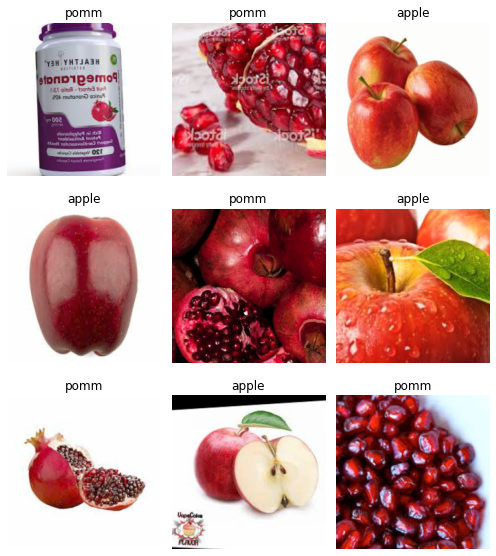

In [27]:
data.show_batch(rows=3, figsize=(7, 8))

In [28]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['apple', 'pomm', 'sample_data'], 3, 513, 128)

In [31]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [32]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.161010,0.434053,0.132812,0.867188,04:56
1,0.767987,0.725343,0.140625,0.859375,04:53
2,0.594187,0.567806,0.101562,0.898438,04:54
3,0.454479,0.394132,0.109375,0.890625,04:59
4,0.380382,0.367292,0.109375,0.890625,04:57


In [33]:
interp = ClassificationInterpretation.from_learner(learn)

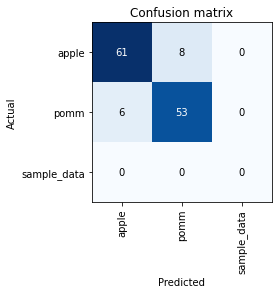

In [42]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *


In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [45]:
learn = create_cnn(db, models.resnet50, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [46]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [47]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


In [48]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
losses,idxs = interp.top_losses()

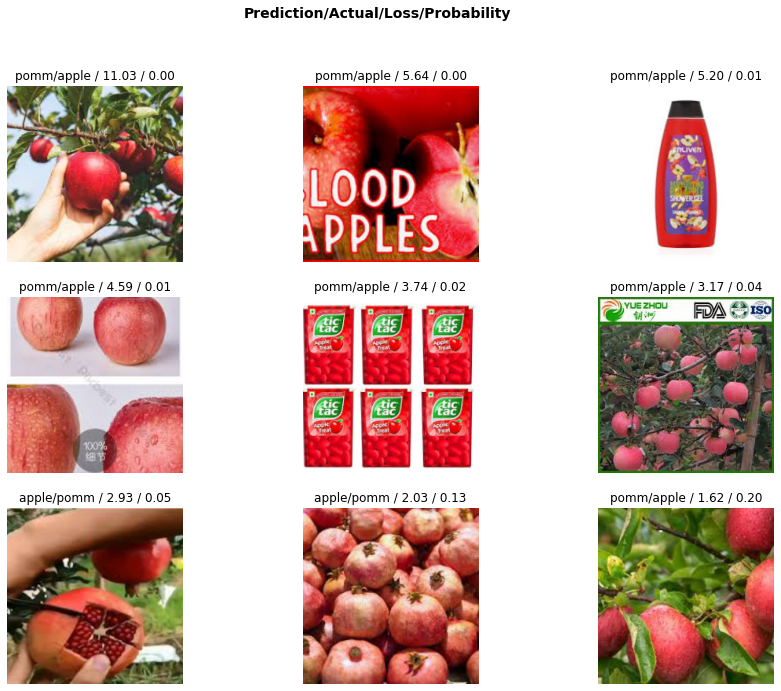

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
from fastai.widgets import *

In [37]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

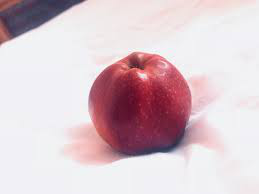

In [51]:
img = open_image(path/'test.jpeg')
img

In [0]:
learn = load_learner(path)

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)